# 神經網路實做

## 拿取加權指數資料

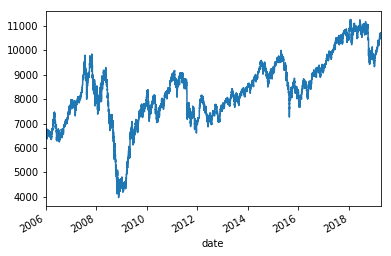

In [1]:
from finlab.data import Data
%matplotlib inline

data = Data()
twii = data.get("發行量加權股價指數")
twii = twii['台股指數']
twii = twii[(twii.index.minute % 15 == 0)  & (twii.index.second == 0)]
twii.plot()

## 製作features

In [2]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

    'return': twii.shift(-10) / twii,
})

feature_names = list(dataset.columns[:-1])

## 刪除NaN

In [3]:
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)


before dropping NaN (62206, 43)
after dropping NaN (60278, 43)


## 神經網路Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataset_scaled = ss.fit_transform(dataset[feature_names])
dataset_scaled = pd.DataFrame(dataset_scaled, index=dataset.index, columns=feature_names)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,...,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,60278.000000
mean,2.489575e-16,1.965256e-15,-3.176095e-15,6.412543e-16,-4.922570e-15,-2.632915e-15,1.886042e-18,-3.394876e-17,1.414531e-17,-2.829063e-17,...,-1.385298e-15,6.601147e-18,-1.414531e-17,1.735159e-16,-9.241606e-17,1.225927e-16,1.188206e-16,-4.451059e-16,-3.017667e-17,1.000112
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.008300
min,-4.491131e+00,-4.498017e+00,-4.474123e+00,-4.425419e+00,-4.390818e+00,-4.329894e+00,-6.601765e+00,-2.571926e+00,-2.642993e+00,-2.614789e+00,...,-5.507580e+00,-7.103968e+00,-6.134322e+00,-2.137025e+00,-1.957330e+00,-1.752563e+00,-1.686516e+00,-1.806230e+00,-1.905031e+00,0.924507
25%,-7.035409e-01,-6.974616e-01,-6.778291e-01,-6.726889e-01,-6.694477e-01,-6.610010e-01,-5.198309e-01,-6.398698e-01,-6.570623e-01,-6.430623e-01,...,-5.137730e-01,-5.064088e-01,-5.224729e-01,-7.452371e-01,-6.857783e-01,-7.319479e-01,-6.848448e-01,-6.817586e-01,-6.886144e-01,0.996970
50%,8.862874e-02,1.156898e-01,1.221761e-01,1.393488e-01,1.451133e-01,1.570421e-01,1.007855e-01,-1.167630e-02,-3.164447e-02,-1.048569e-03,...,1.131675e-01,8.643829e-02,8.966023e-02,-1.371626e-01,-2.285498e-01,-2.430415e-01,-1.969991e-01,-1.584369e-01,-1.951818e-01,1.000239
75%,7.369285e-01,7.273276e-01,7.146140e-01,7.252098e-01,7.305081e-01,7.280411e-01,6.363429e-01,6.517389e-01,6.745452e-01,6.173513e-01,...,5.551963e-01,6.045138e-01,6.253190e-01,6.079186e-01,4.605780e-01,4.572949e-01,4.335557e-01,4.105331e-01,5.482171e-01,1.003679
max,2.972881e+00,2.961764e+00,3.057171e+00,3.060424e+00,3.047722e+00,3.021261e+00,4.382527e+00,2.713237e+00,2.550176e+00,2.504721e+00,...,4.914214e+00,5.681204e+00,4.769627e+00,4.625856e+00,3.792163e+00,4.420270e+00,3.994220e+00,3.941022e+00,3.814336e+00,1.087726


In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,...,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,6.027800e+04,60278.000000
mean,2.489575e-16,1.965256e-15,-3.176095e-15,6.412543e-16,-4.922570e-15,-2.632915e-15,1.886042e-18,-3.394876e-17,1.414531e-17,-2.829063e-17,...,-1.385298e-15,6.601147e-18,-1.414531e-17,1.735159e-16,-9.241606e-17,1.225927e-16,1.188206e-16,-4.451059e-16,-3.017667e-17,1.000112
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.008300
min,-4.491131e+00,-4.498017e+00,-4.474123e+00,-4.425419e+00,-4.390818e+00,-4.329894e+00,-6.601765e+00,-2.571926e+00,-2.642993e+00,-2.614789e+00,...,-5.507580e+00,-7.103968e+00,-6.134322e+00,-2.137025e+00,-1.957330e+00,-1.752563e+00,-1.686516e+00,-1.806230e+00,-1.905031e+00,0.924507
25%,-7.035409e-01,-6.974616e-01,-6.778291e-01,-6.726889e-01,-6.694477e-01,-6.610010e-01,-5.198309e-01,-6.398698e-01,-6.570623e-01,-6.430623e-01,...,-5.137730e-01,-5.064088e-01,-5.224729e-01,-7.452371e-01,-6.857783e-01,-7.319479e-01,-6.848448e-01,-6.817586e-01,-6.886144e-01,0.996970
50%,8.862874e-02,1.156898e-01,1.221761e-01,1.393488e-01,1.451133e-01,1.570421e-01,1.007855e-01,-1.167630e-02,-3.164447e-02,-1.048569e-03,...,1.131675e-01,8.643829e-02,8.966023e-02,-1.371626e-01,-2.285498e-01,-2.430415e-01,-1.969991e-01,-1.584369e-01,-1.951818e-01,1.000239
75%,7.369285e-01,7.273276e-01,7.146140e-01,7.252098e-01,7.305081e-01,7.280411e-01,6.363429e-01,6.517389e-01,6.745452e-01,6.173513e-01,...,5.551963e-01,6.045138e-01,6.253190e-01,6.079186e-01,4.605780e-01,4.572949e-01,4.335557e-01,4.105331e-01,5.482171e-01,1.003679
max,2.972881e+00,2.961764e+00,3.057171e+00,3.060424e+00,3.047722e+00,3.021261e+00,4.382527e+00,2.713237e+00,2.550176e+00,2.504721e+00,...,4.914214e+00,5.681204e+00,4.769627e+00,4.625856e+00,3.792163e+00,4.420270e+00,3.994220e+00,3.941022e+00,3.814336e+00,1.087726


## 神經網路 Model

In [6]:
import keras.layers as layers
from keras.models import Sequential
import keras

model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(feature_names),)))
#model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer="adam", )

ModuleNotFoundError: No module named 'keras'

## 神經網路訓練

In [20]:
dataset_scaled_train = dataset_scaled[:'2015']


model.fit(dataset_scaled_train[feature_names], dataset_scaled_train['return'] > 1)

Epoch 1/1
45221/45221 [==============================] - 1s 31us/step - loss: 0.6908


## 回測

In [21]:
ey = model.predict(dataset_scaled[feature_names])
ey = pd.Series(ey.swapaxes(0, 1)[0], index=dataset.index)

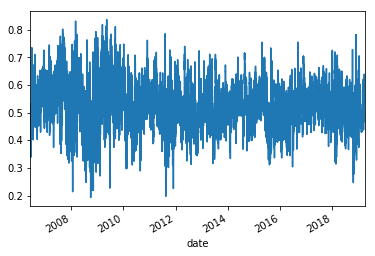

In [22]:
ey.plot()

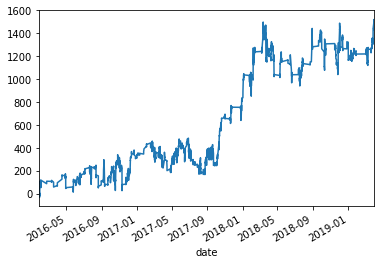

In [23]:
eq = twii[dataset.index]
gain = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.7)).rolling(10).sum() > 0

eq = (gain[signal]['2016':]).cumsum()
eq.plot()

In [24]:
(signal.astype(int).diff().abs().fillna(0) * 3)['2016':].sum()

765.0